<a href="https://colab.research.google.com/github/fjpAntunes/mean-field-tools/blob/main/experiments/anaylitcForwardNumericalBackwardExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Toy problem Setup:

* Forward component:
  $$ dX_t = -kX_t dt + dW_t $$

* Backwards component:
$$ dY_t= 2X_tdt + Z_t dW_t $$
$$ Y_t = Y_T -\int_t^T 2X_s ds - \int_t^T Z_s dW_s, \\
Y_T = X_T^2 $$

Writing the equation in the form $dY_t = - f(t,X_t)dt + Z_t dW_t $, we have that $f(t,X_t) = -2X_t$

### Analytic Solution
$$
Y_t = X_t^2 e^{-2k(T-t)} + \left( \frac{1 - e^{-2k(T-t)}}{2k} \right) - 2 X_t \left( \frac{1 - e^{-k(T-t)}}{k} \right)
$$

In [ ]:
# @title Setup
!git clone -b develop https://github.com/fjpAntunes/mean-field-tools.git

Cloning into 'mean-field-tools'...
remote: Enumerating objects: 442, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 442 (delta 44), reused 42 (delta 31), pack-reused 324
Receiving objects: 100% (442/442), 8.30 MiB | 11.31 MiB/s, done.
Resolving deltas: 100% (259/259), done.


In [ ]:
%cd mean-field-tools/

/content/mean-field-tools


# Terminal Quadratic - With Drift

In [ ]:
"""Tests Ornstein-Uhlenbeck as forward process"""

from mean_field_tools.deep_bsde.forward_backward_sde import (
    Filtration,
    BackwardSDE,
    ForwardSDE,
    ForwardBackwardSDE,
)
from mean_field_tools.deep_bsde.function_approximator import FunctionApproximatorArtist
import torch
import numpy as np


torch.cuda.empty_cache()

TIME_DOMAIN = torch.linspace(0, 1, 101)
NUMBER_OF_PATHS = 100_000
SPATIAL_DIMENSIONS = 1

K = 1

def OU_FUNCTIONAL_FORM(filtration):
    dummy_time = filtration.time_process[:, 1:, 0].unsqueeze(-1)
    integrand = torch.exp(K * dummy_time) * filtration.brownian_increments

    initial = torch.zeros(
        size=(filtration.number_of_paths, 1, filtration.spatial_dimensions)
    )
    integral = torch.cat([initial, torch.cumsum(integrand, dim=1)], dim=1)

    time = filtration.time_process[:, :, 0].unsqueeze(-1)
    path = torch.exp(-K * time) * integral
    return path


def BACKWARD_DRIFT(filtration: Filtration):
    X_t = filtration.forward_process

    return -2 * X_t

def ZERO_DRIFT(filtration: Filtration):
    t = filtration.time_process

    return 0*t

def TERMINAL_CONDITION(filtration: Filtration):
    X_T = filtration.forward_process[:, -1, :]

    return X_T**2

FILTRATION = Filtration(
    spatial_dimensions=SPATIAL_DIMENSIONS, time_domain=TIME_DOMAIN, number_of_paths=NUMBER_OF_PATHS, seed=0
)

forward_sde = ForwardSDE(
    filtration=FILTRATION,
    functional_form=OU_FUNCTIONAL_FORM,
)


device = "cuda" if torch.cuda.is_available() else "cpu"

backward_sde = BackwardSDE(
    terminal_condition_function=TERMINAL_CONDITION,
    filtration=FILTRATION,
    exogenous_process=["time_process", "forward_process"],
    drift=BACKWARD_DRIFT,
)
backward_sde.initialize_approximator(nn_args = {'device': device})


forward_backward_sde = ForwardBackwardSDE(
    filtration=FILTRATION, forward_sde=forward_sde, backward_sde=backward_sde
)



In [ ]:
def ANALYTICAL_SOLUTION(x,t,T):
  return x**2 * np.exp(-2*K * (T - t)) + ( (1 - np.exp(- 2 * K * ( T - t ) ) ) / ( 2 * K )  ) - 2 * x * ( (1 - np.exp(- K * (T - t) ) ) / K )

artist = FunctionApproximatorArtist(
    save_figures=False,  analytical_solution=ANALYTICAL_SOLUTION
)


In [ ]:
%pdb

Automatic pdb calling has been turned ON


Epoch 1


100%|██████████| 100/100 [00:12<00:00,  7.73it/s]


Epoch 2


100%|██████████| 100/100 [00:12<00:00,  8.11it/s]


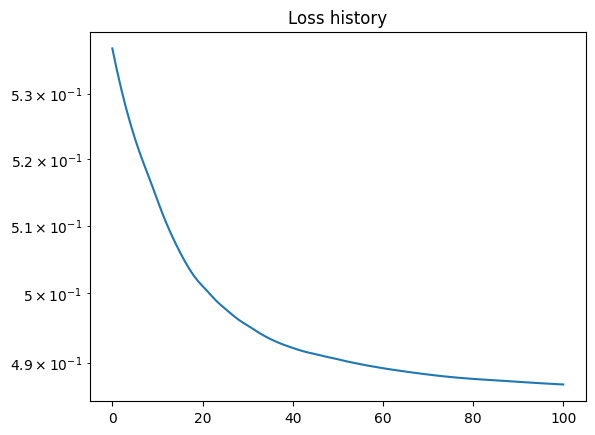

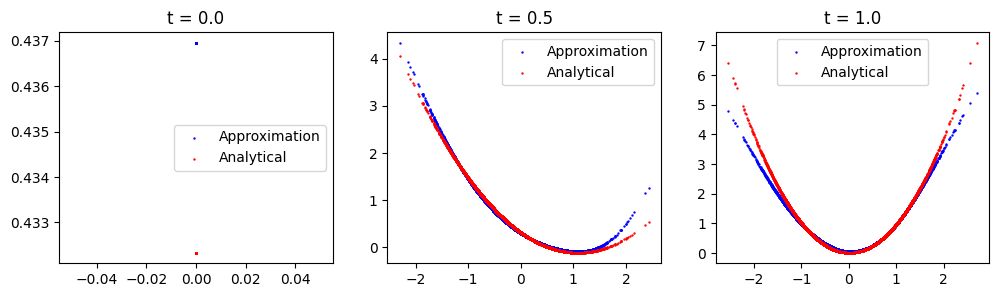

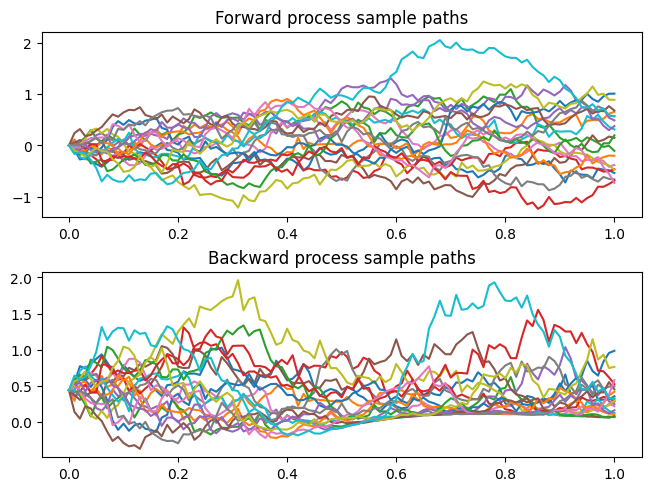

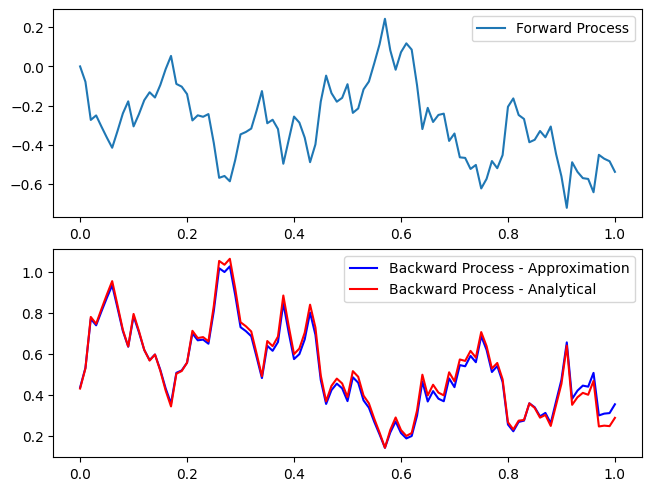

Epoch 3


100%|██████████| 100/100 [00:12<00:00,  7.92it/s]


Epoch 4


100%|██████████| 100/100 [00:12<00:00,  7.86it/s]


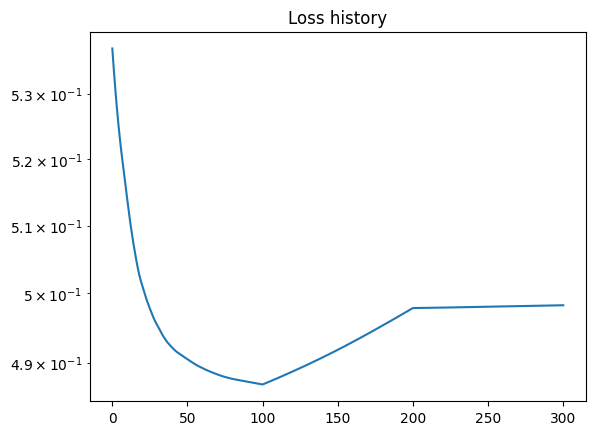

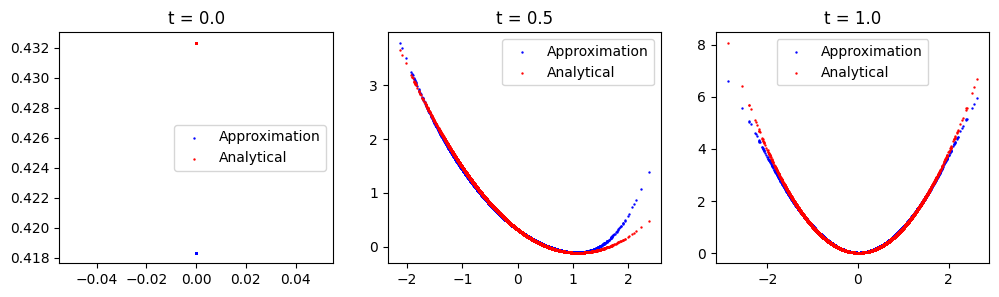

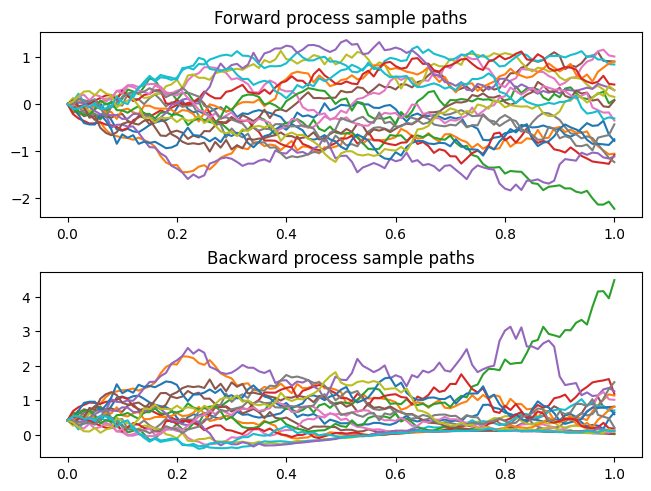

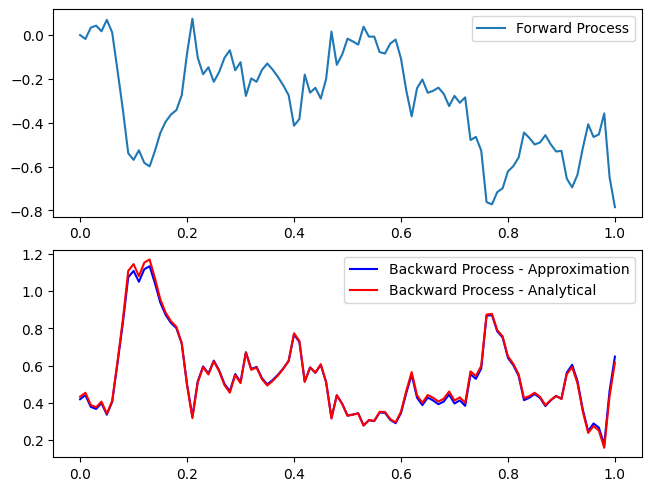

Epoch 5


100%|██████████| 100/100 [00:12<00:00,  7.98it/s]


Epoch 6


100%|██████████| 100/100 [00:12<00:00,  8.02it/s]


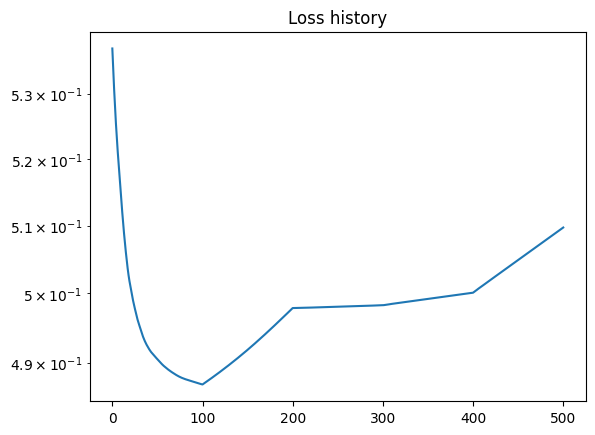

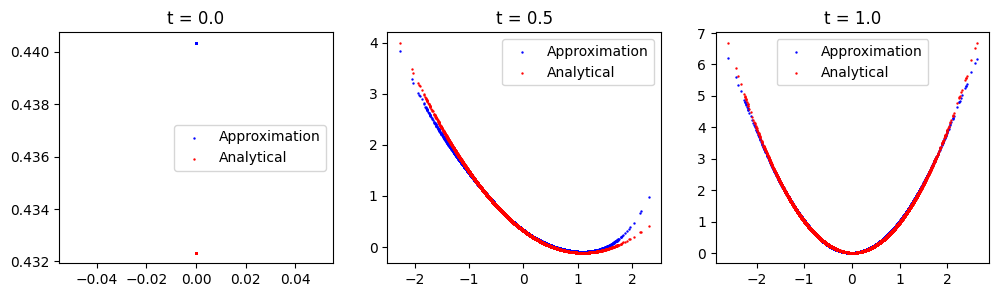

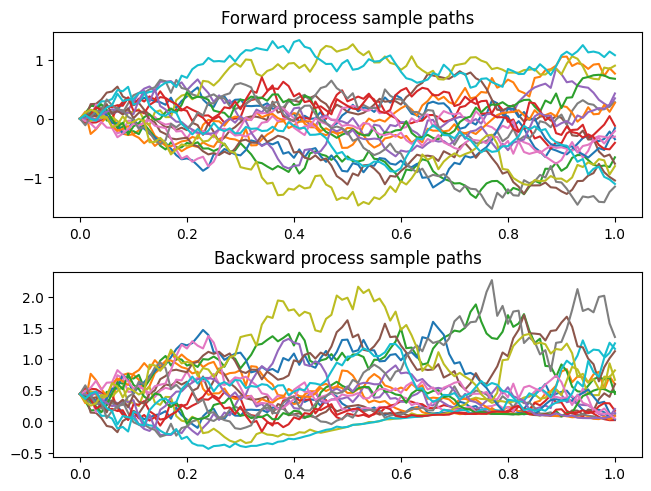

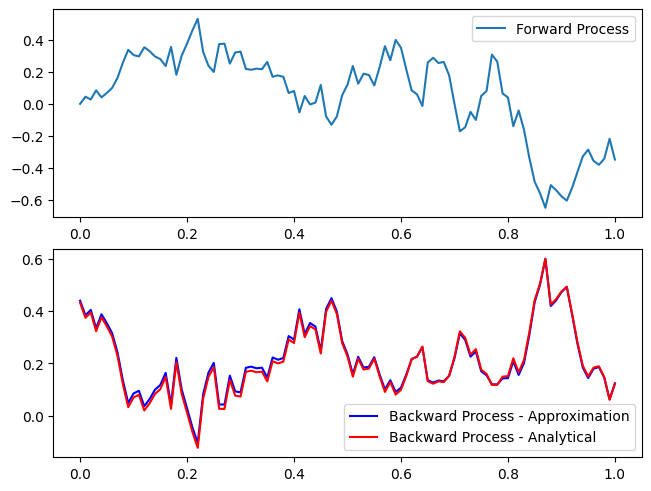

Epoch 7


100%|██████████| 100/100 [00:12<00:00,  8.03it/s]


Epoch 8


100%|██████████| 100/100 [00:12<00:00,  8.02it/s]


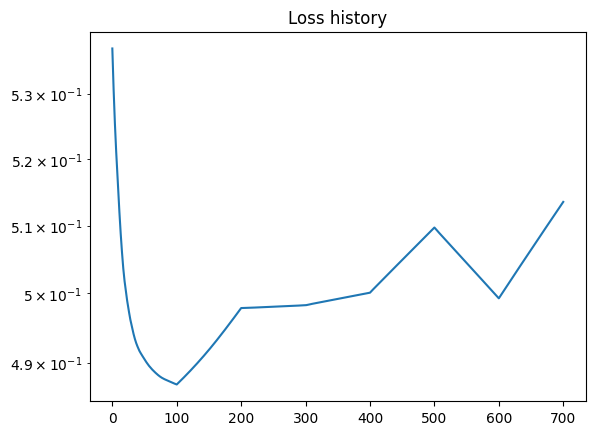

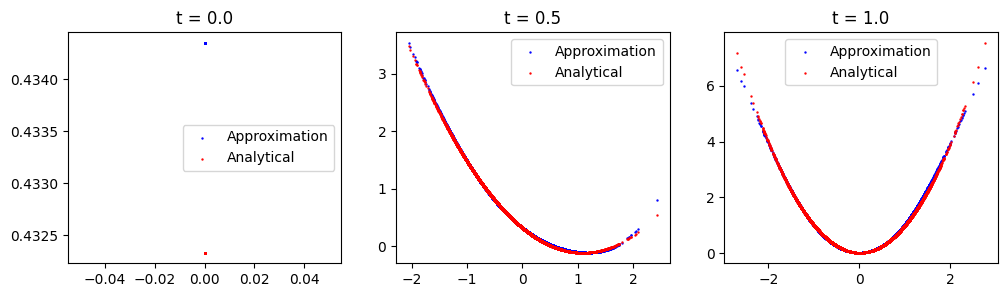

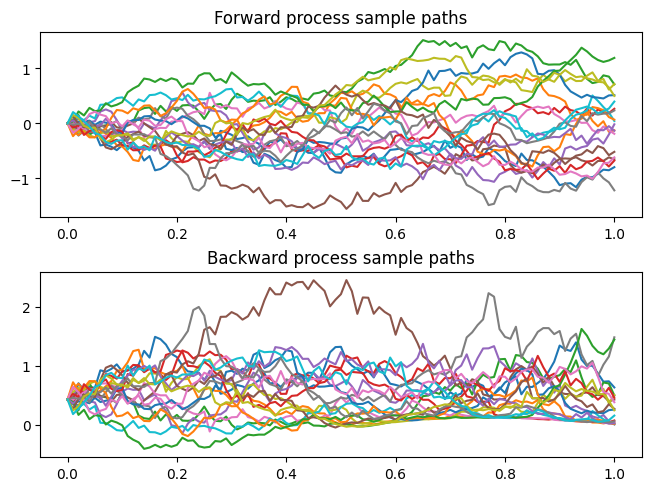

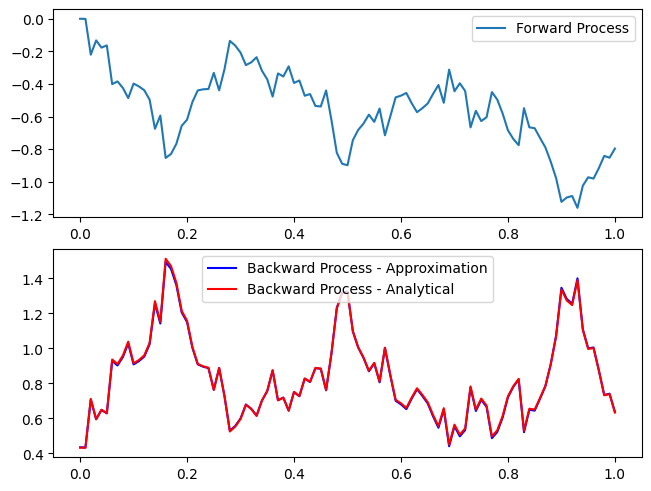

Epoch 9


100%|██████████| 100/100 [00:12<00:00,  7.99it/s]


Epoch 10


100%|██████████| 100/100 [00:12<00:00,  7.99it/s]


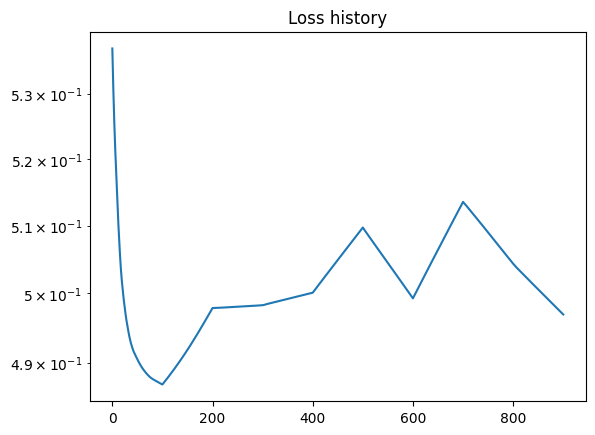

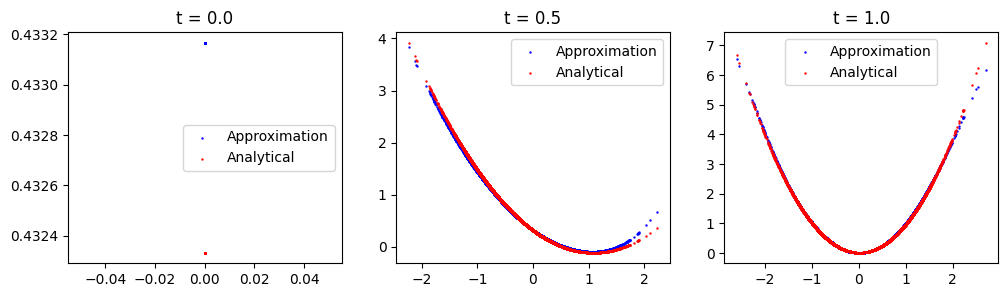

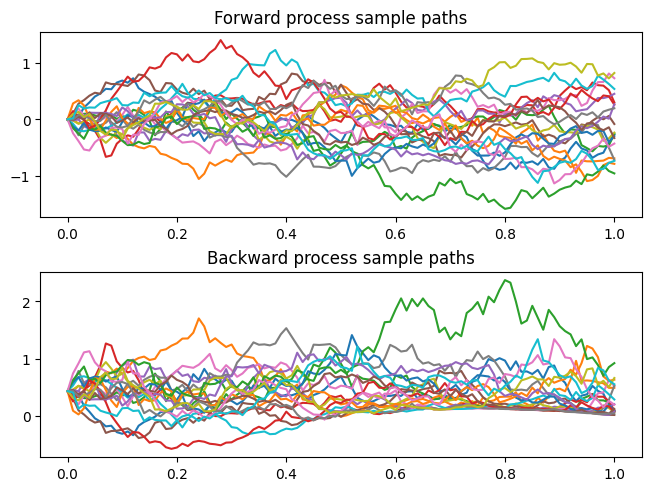

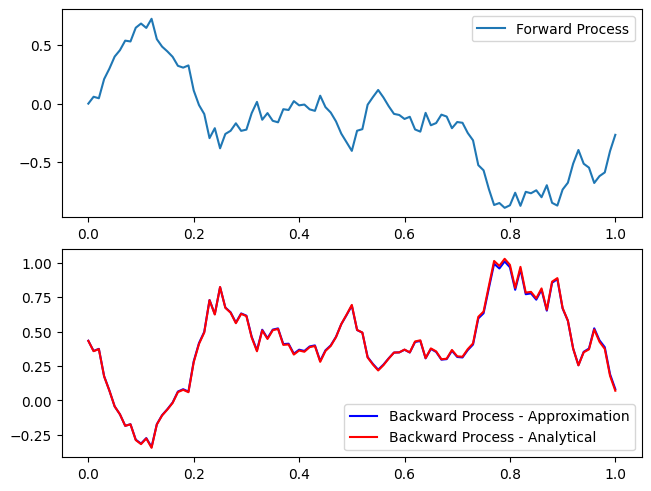

Epoch 11


100%|██████████| 100/100 [00:12<00:00,  8.00it/s]


Epoch 12


100%|██████████| 100/100 [00:12<00:00,  8.01it/s]


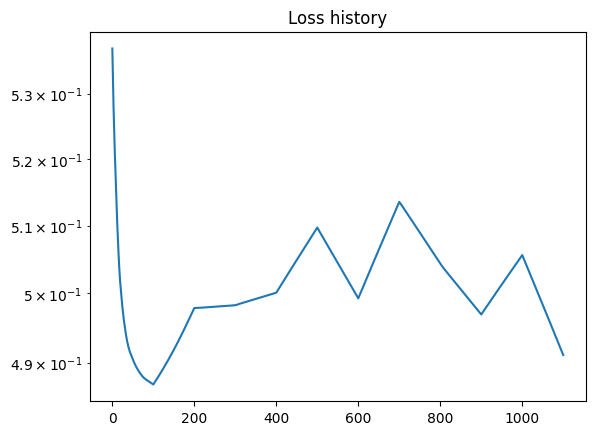

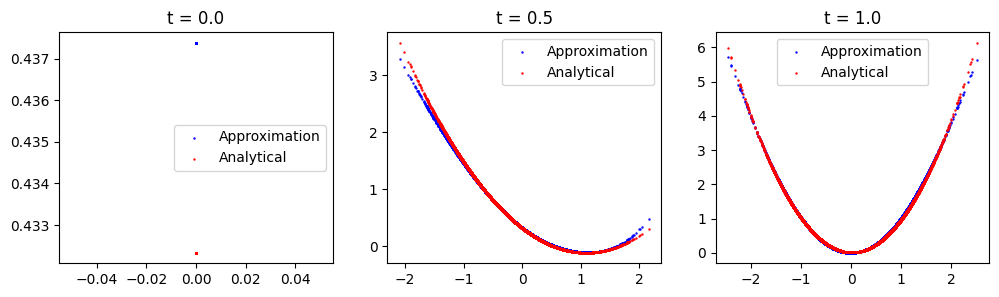

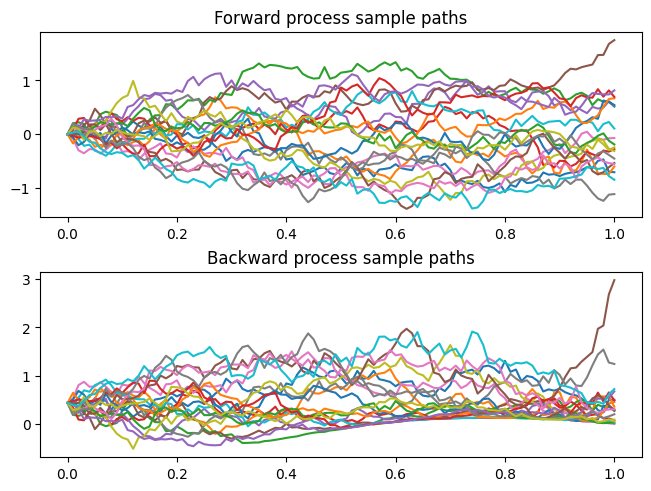

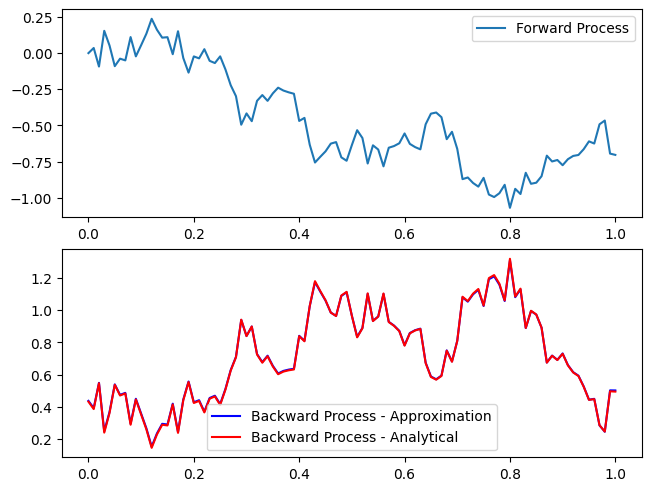

Epoch 13


100%|██████████| 100/100 [00:12<00:00,  8.02it/s]


Epoch 14


100%|██████████| 100/100 [00:12<00:00,  8.03it/s]


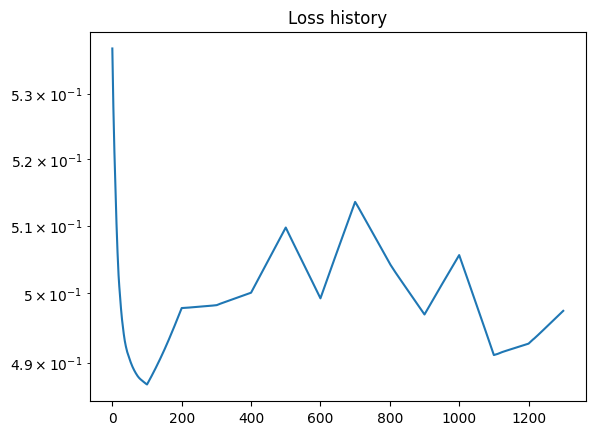

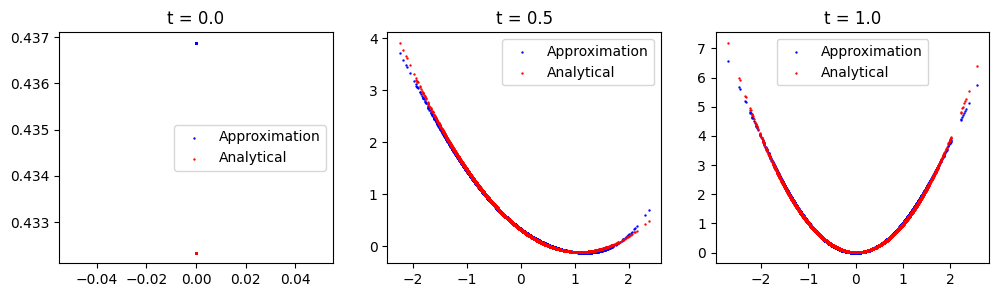

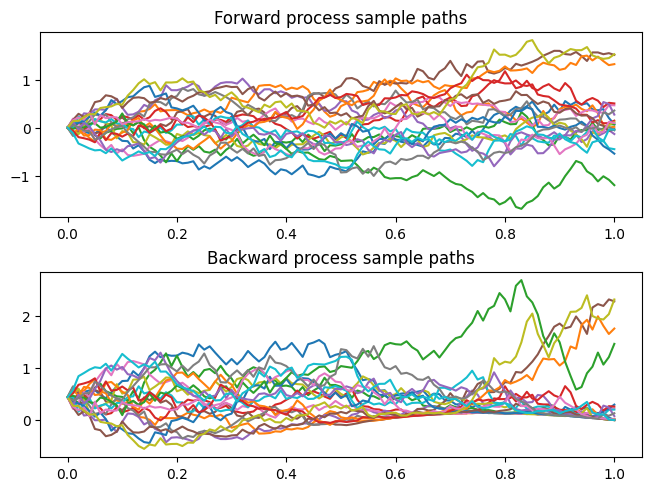

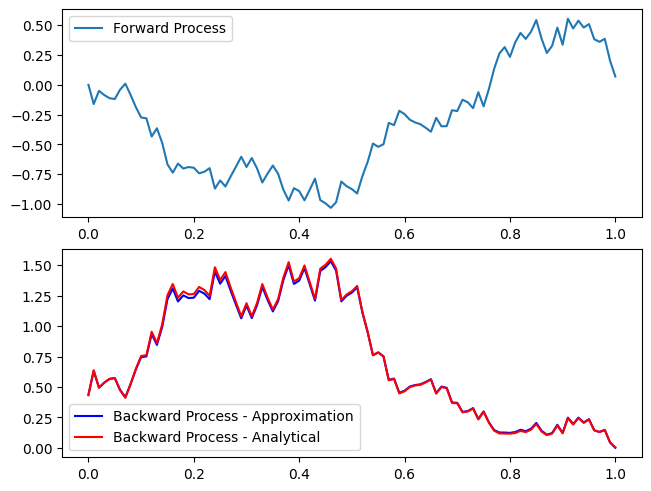

Epoch 15


100%|██████████| 100/100 [00:12<00:00,  7.99it/s]


Epoch 16


100%|██████████| 100/100 [00:12<00:00,  8.03it/s]


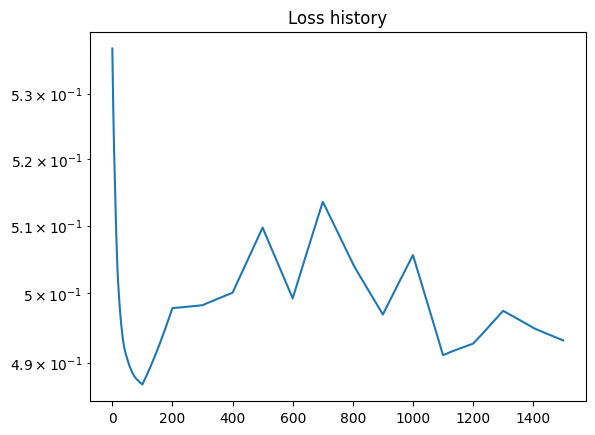

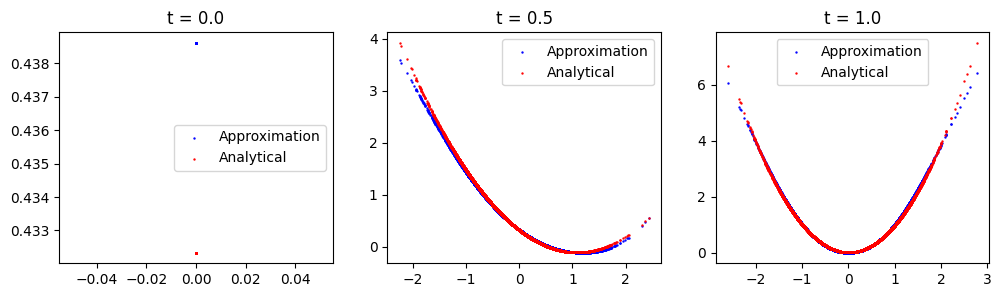

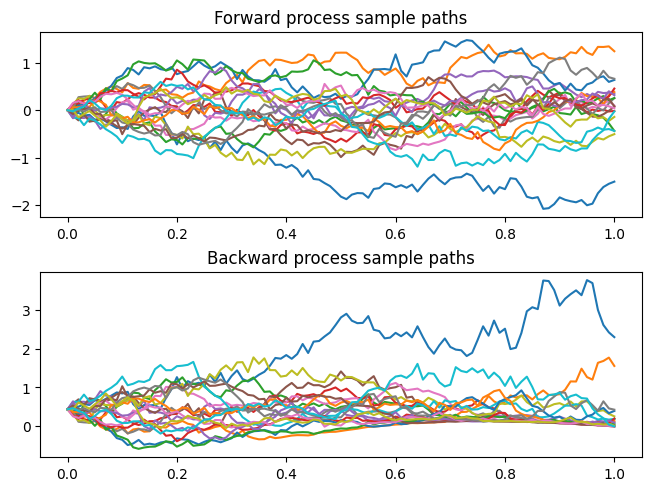

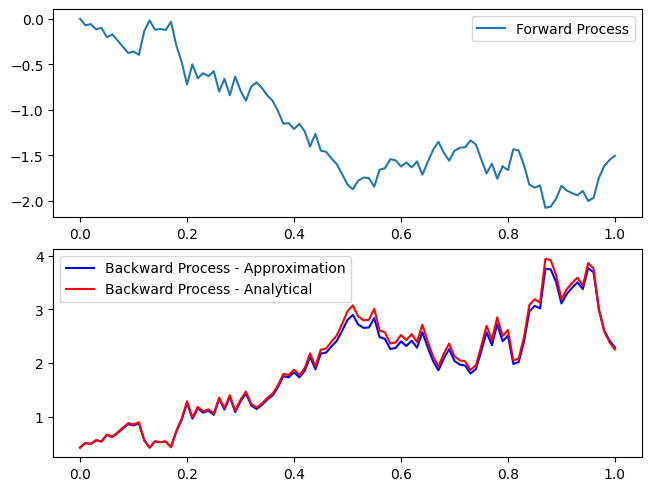

Epoch 17


100%|██████████| 100/100 [00:12<00:00,  8.02it/s]


Epoch 18


100%|██████████| 100/100 [00:12<00:00,  8.01it/s]


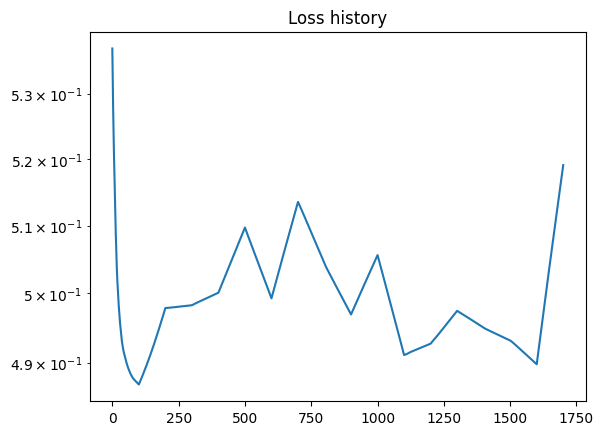

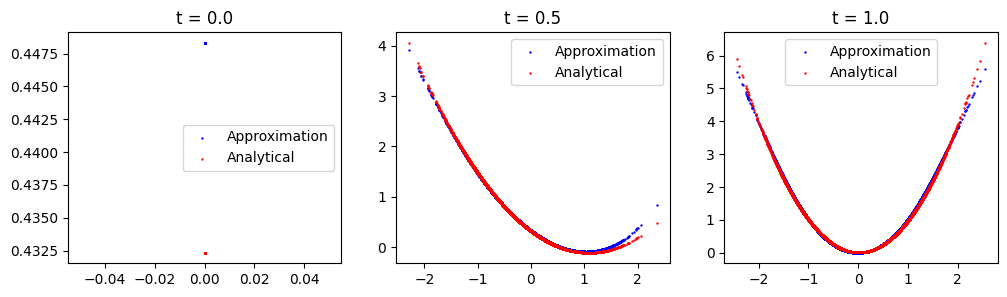

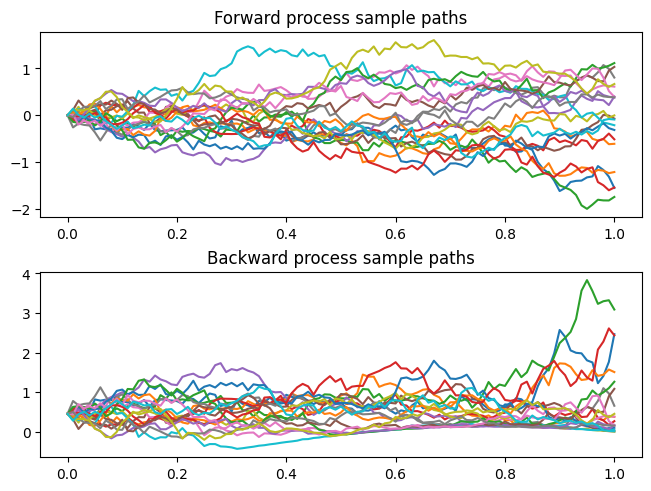

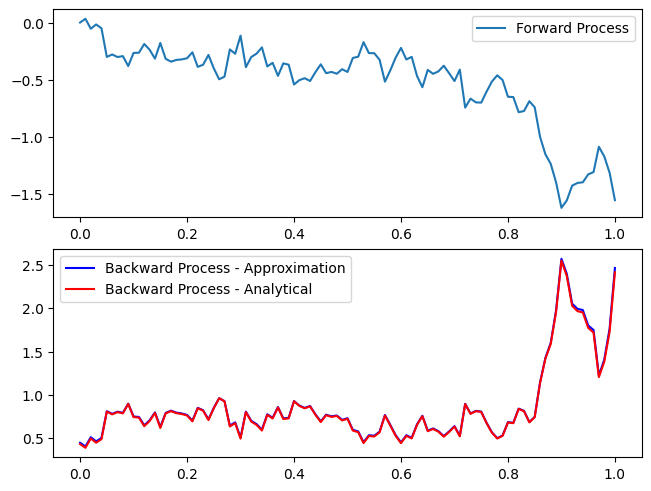

Epoch 19


100%|██████████| 100/100 [00:12<00:00,  8.00it/s]


Epoch 20


100%|██████████| 100/100 [00:12<00:00,  8.02it/s]


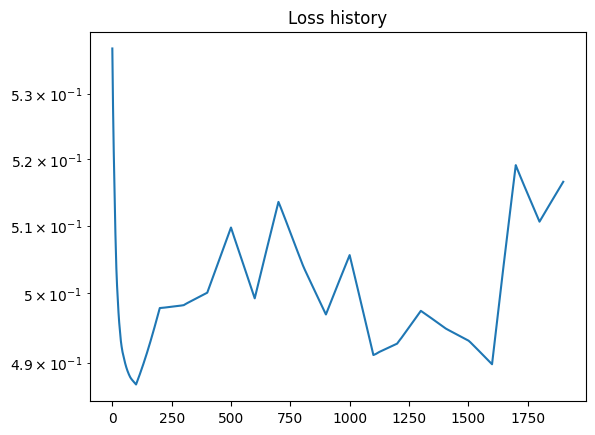

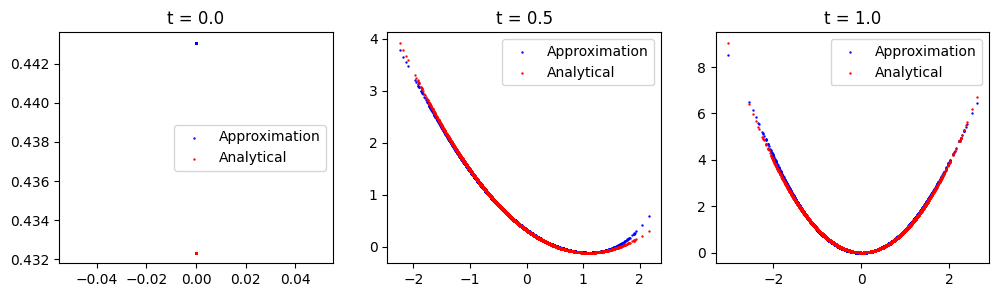

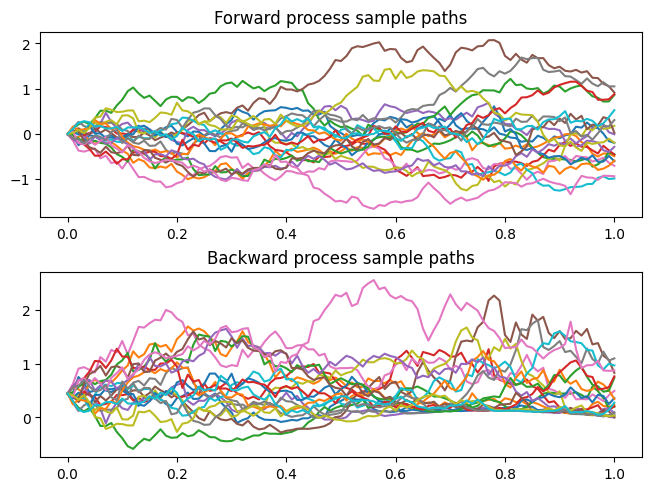

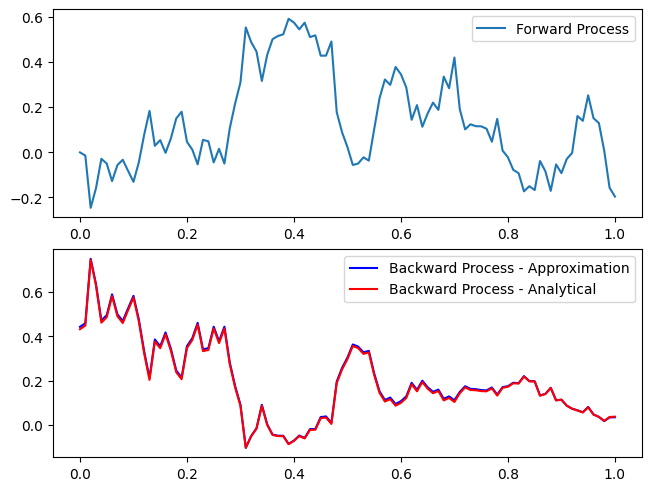

In [ ]:
APPROXIMATOR_ARGS = {
        "batch_size": 20_000,
        "number_of_iterations": 2_000,
        "number_of_epochs": 20,
        "number_of_plots": 10,
        "plotter": artist,
    }

forward_backward_sde.backward_solve(approximator_args=APPROXIMATOR_ARGS)